# Conceção e otimização de modelos de Machine Learning

### Dados
Neste trabalho, será usado o dataset <em>data.csv</em>

Este dataset contem casos 4 600 e 18 features, incluindo:

- date
- price
- bedrooms
- bathrooms
- sqft_living
- sqft_lot
- floors
- waterfront
- view
- condition
- sqft_above
- sqft_basement
- yr_built
- yr_renovated
- street
- city
- statezip
- country 

## Importar Bibliotecas

In [881]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
%matplotlib inline

## Ler Dados

In [882]:
# https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset
data = pd.read_csv('datasets/healthcare-dataset-stroke-data.csv')

In [883]:
data.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [884]:
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [885]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [886]:
data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


## 1. Valores em Falta

In [887]:
data.nunique()


id                   5110
gender                  3
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    3979
bmi                   418
smoking_status          4
stroke                  2
dtype: int64

In [888]:
data.duplicated().sum()

0

In [889]:
data.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

<Axes: >

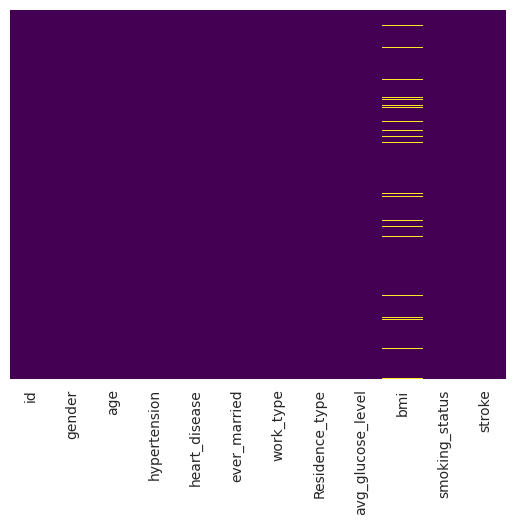

In [890]:
sns.heatmap(data.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [891]:
male_data = data[data['gender'] == 'Male']['bmi'].mean()
#male_data.mean()

female_data = data[data['gender'] == 'Female']['bmi'].mean()
#female_data.mean()

print(male_data, female_data)

28.64793635007459 29.065757680358992


In [892]:
#data[data['gender'] == 'Male', 'bmi'].fillna(male_data.round(1))
#data[data['gender'] == 'Female', 'bmi'].fillna(female_data.round(1))

#data.loc[data['gender'] == 'Female', 'bmi'] = female_data.round(1)
data['bmi'] = data.apply(lambda row: male_data if pd.isna(row['bmi']) and row['gender'] == 'Male' else row['bmi'], axis=1)
data['bmi'] = data.apply(lambda row: female_data if pd.isna(row['bmi']) and row['gender'] == 'Female' else row['bmi'], axis=1)

In [893]:
data['bmi'].isna().sum()

0

<Axes: >

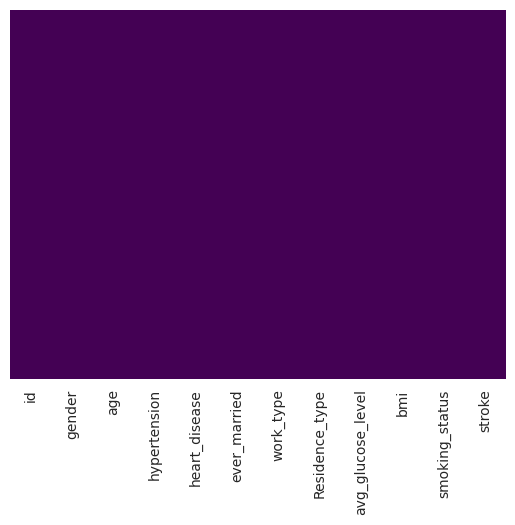

In [894]:
sns.heatmap(data.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [895]:
# drop line where gender is other

data.drop(data[data['gender'] == 'Other'].index, inplace=True)

#data.head()
data.nunique()

id                   5109
gender                  2
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    3978
bmi                   420
smoking_status          4
stroke                  2
dtype: int64

In [896]:
data.nunique()

id                   5109
gender                  2
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    3978
bmi                   420
smoking_status          4
stroke                  2
dtype: int64

### Drop or fill

In [897]:
data.drop(['id'],axis=1,inplace=True)
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,29.065758,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


### OUTLIERS

In [898]:
#data['bmi'].astype('float')
data['bmi'].describe()
#data['bmi'].max()

count    5109.000000
mean       28.892790
std         7.698351
min        10.300000
25%        23.800000
50%        28.400000
75%        32.800000
max        97.600000
Name: bmi, dtype: float64

Price

In [899]:
from scipy import stats


# z_scores = stats.zscore(data['bmi'].astype(float))
# threshold = 3
# df_no_outliers = data[(z_scores < threshold)]
# print(df_no_outliers.shape)
# df_no_outliers['bmi'].astype(float).describe()

data['bmi'].astype(float)
lower_limit = data['bmi'].quantile(0.01)
upper_limit = data['bmi'].quantile(0.998)
data['bmi'] = data['bmi'].clip(lower_limit, upper_limit)
data['bmi'].describe()



count    5109.000000
mean       28.881480
std         7.549026
min        15.108000
25%        23.800000
50%        28.400000
75%        32.800000
max        60.900000
Name: bmi, dtype: float64

<Axes: xlabel='bmi'>

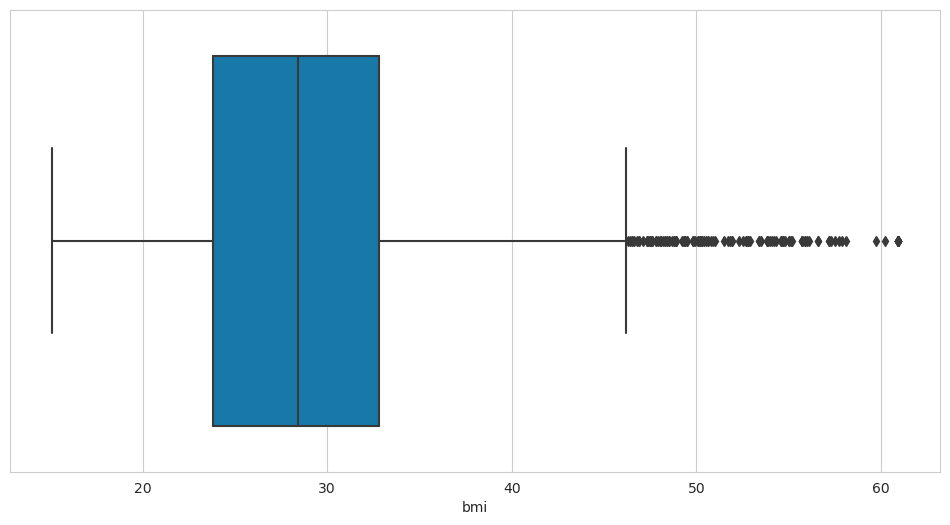

In [900]:
plt.figure(figsize=(12,6))
sns.boxplot(x=data['bmi'],palette='winter')

## 2. Tratamento de dados categóricos

In [901]:
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,29.065758,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


In [902]:
lb = LabelEncoder()

Work_typeLe = lb.fit(data['work_type'])

data['work_type'] = Work_typeLe.transform(data['work_type'])

data['work_type'].value_counts()

work_type
2    2924
3     819
4     687
0     657
1      22
Name: count, dtype: int64

In [903]:
Residence_typeLe = lb.fit(data['Residence_type'])

data['Residence_type'] = Residence_typeLe.transform(data['Residence_type'])

data['Residence_type'].value_counts()

Residence_type
1    2596
0    2513
Name: count, dtype: int64

In [904]:


Smoking_statusLe = lb.fit(data['smoking_status'])

data['smoking_status'] = Smoking_statusLe.transform(data['smoking_status'])

data['smoking_status'].value_counts()


data['smoking_status'].value_counts()

smoking_status
2    1892
0    1544
1     884
3     789
Name: count, dtype: int64

In [905]:
data['gender'] = data['gender'].map({'Male': 1, 'Female': 0})
data['ever_married'] = data['ever_married'].map({'Yes': 1, 'No': 0})

In [906]:
data['gender'].value_counts()

gender
0    2994
1    2115
Name: count, dtype: int64

In [907]:
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.600000,1,1
1,0,61.0,0,0,1,3,0,202.21,29.065758,2,1
2,1,80.0,0,1,1,2,0,105.92,32.500000,2,1
3,0,49.0,0,0,1,2,1,171.23,34.400000,3,1
4,0,79.0,1,0,1,3,0,174.12,24.000000,2,1


In [908]:
#'Desconhecido:-1','Muito Baixo:0', 'Baixo:1', 'Médio:2', 'Alto:3', 'Muito Alto:4'
# labels = ['0','1', '2', '3', '4']

# bins = [0, 250000, 450000, 800000, 1200000, 30000000]

# # Crie uma nova coluna 'Levy_Category' com as categorias
# data['price'] = pd.cut(data['price'], bins=bins, labels=labels, right=False)

# # Visualize as categorias
# print(data['price'].value_counts())

In [909]:
# price_count = data['price'].value_counts()
# sns.set(style="darkgrid")
# sns.barplot(x=price_count.index, y=price_count.values)
# plt.title('Frequency Distribution of houses')
# plt.ylabel('Number of houses', fontsize=12)
# plt.xlabel('Labels (price)', fontsize=12)
# plt.show()

In [910]:
# labels = data['price'].astype('category').cat.categories.tolist()
# counts = data['price'].value_counts()
# sizes = [counts[var_cat] for var_cat in labels]
# fig1, ax1 = plt.subplots()
# ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True)
# ax1.axis('equal')
# plt.show()

In [911]:
# data.Mileage = data.Mileage.map(lambda x: x.rstrip(' km'))
# data.Mileage = data.Mileage.astype('float')
# #data['Mileage'] = data['Mileage'].str.replace(' km', '')
# print(data['Mileage'].median())
# print("max -> " ,data['Mileage'].max(), "| min -> ", data['Mileage'].min())

In [912]:
# #'Novo :0', 'Poucos Km's:1', 'Medio Km's:2', 'Muitos km's :3', 'Muitos Muitos Km's:4'
# labels = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

# bins = [ 0, 1000, 2000, 5000, 10000, 20000, 50000, 100000, 250000 , 500000, 10000000000000]

# # Crie uma nova coluna 'Levy_Category' com as categorias
# data['Price'] = pd.cut(data['Price'], bins=bins, labels=labels, right=False)

# # Visualize as categorias
# print(data['Price'].value_counts())

Text(0.5, 1.0, 'Correlação entre variáveis e stroke')

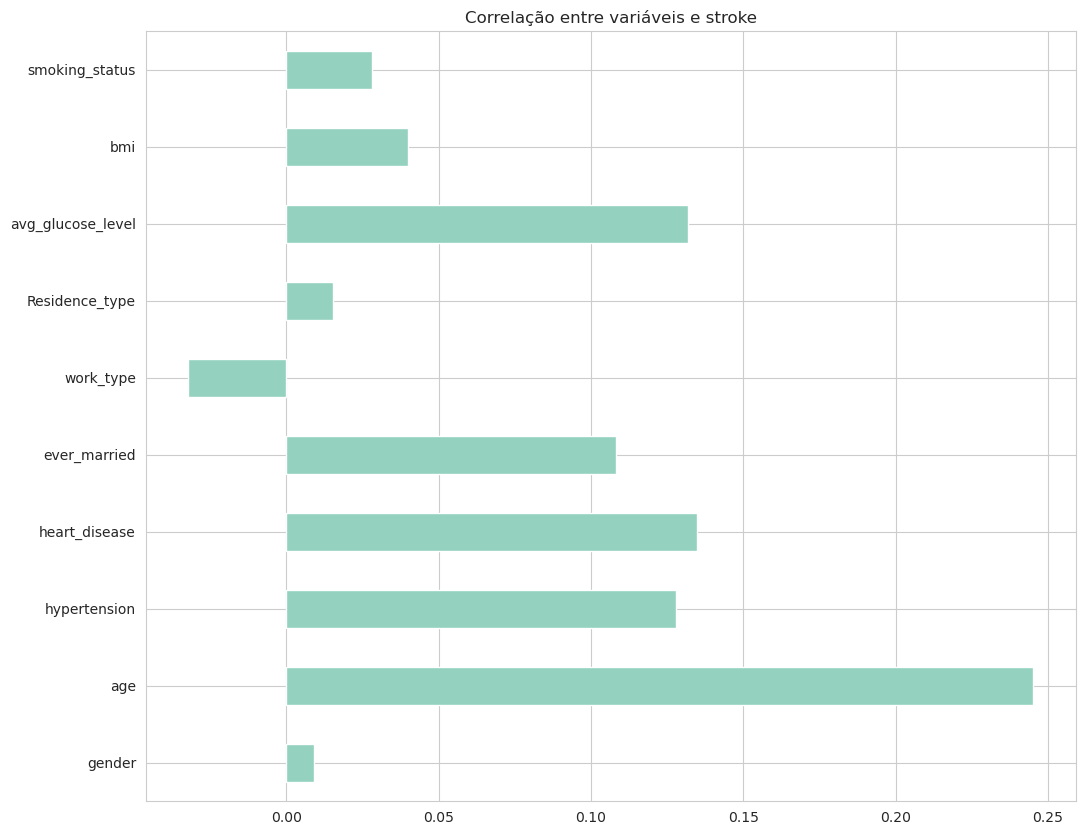

In [913]:
plt.figure(figsize=(12,10))
corr = data.corr()["stroke"]
corr[np.argsort(corr, axis=0)[::-1]]
corr = corr[:-1] 
corr.plot(kind='barh') 

plt.title("Correlação entre variáveis e stroke")

<Axes: >

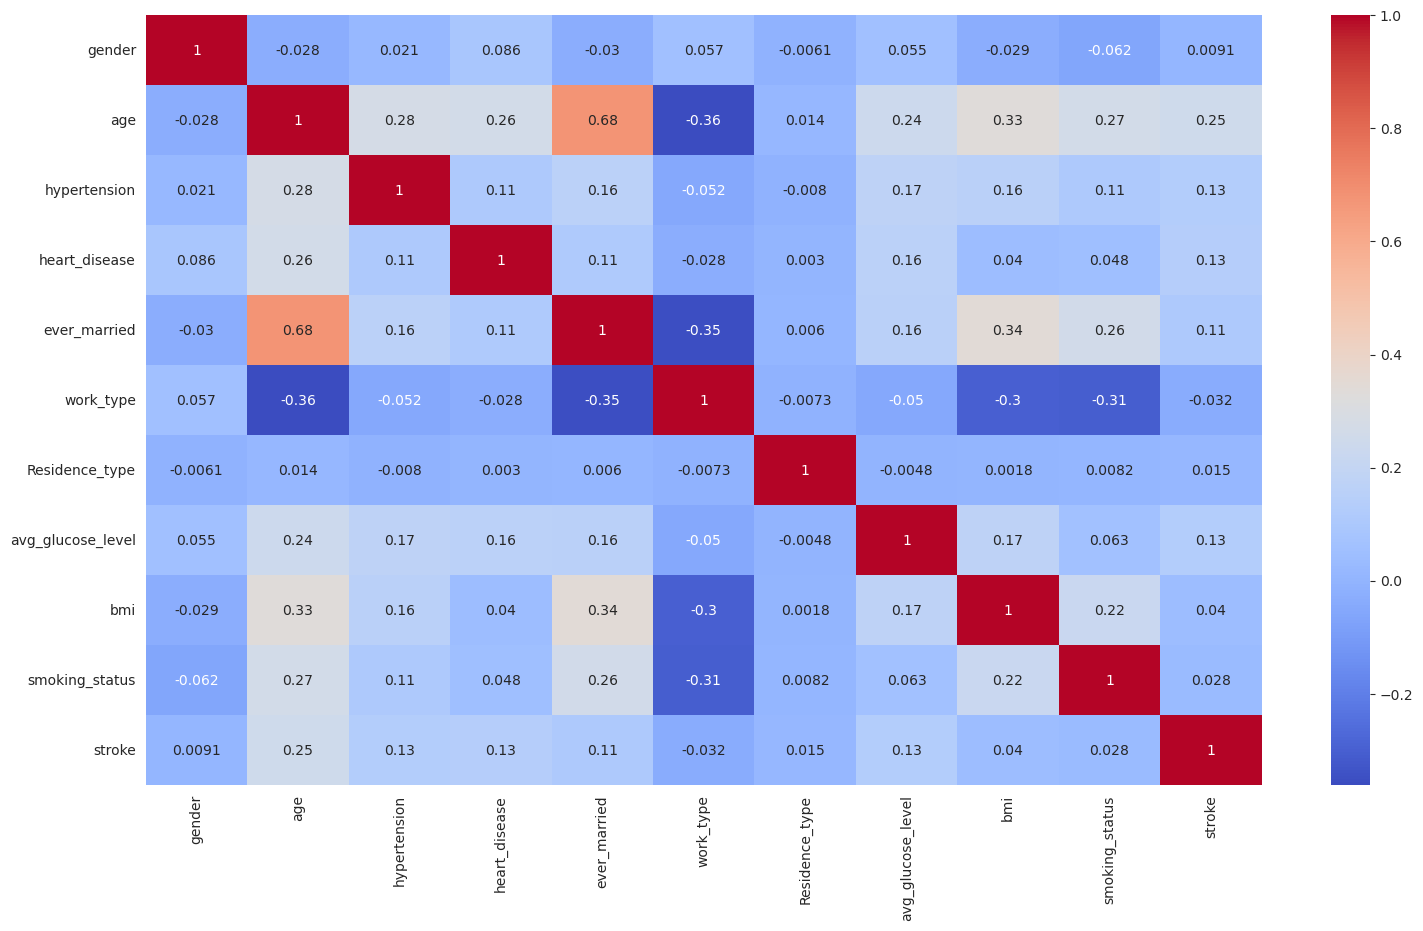

In [914]:
plt.subplots(figsize=(18,10))
sns.heatmap(data.corr(), annot = True, cmap='coolwarm')

/home/henrique/miniconda3/envs/DAA_T2/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


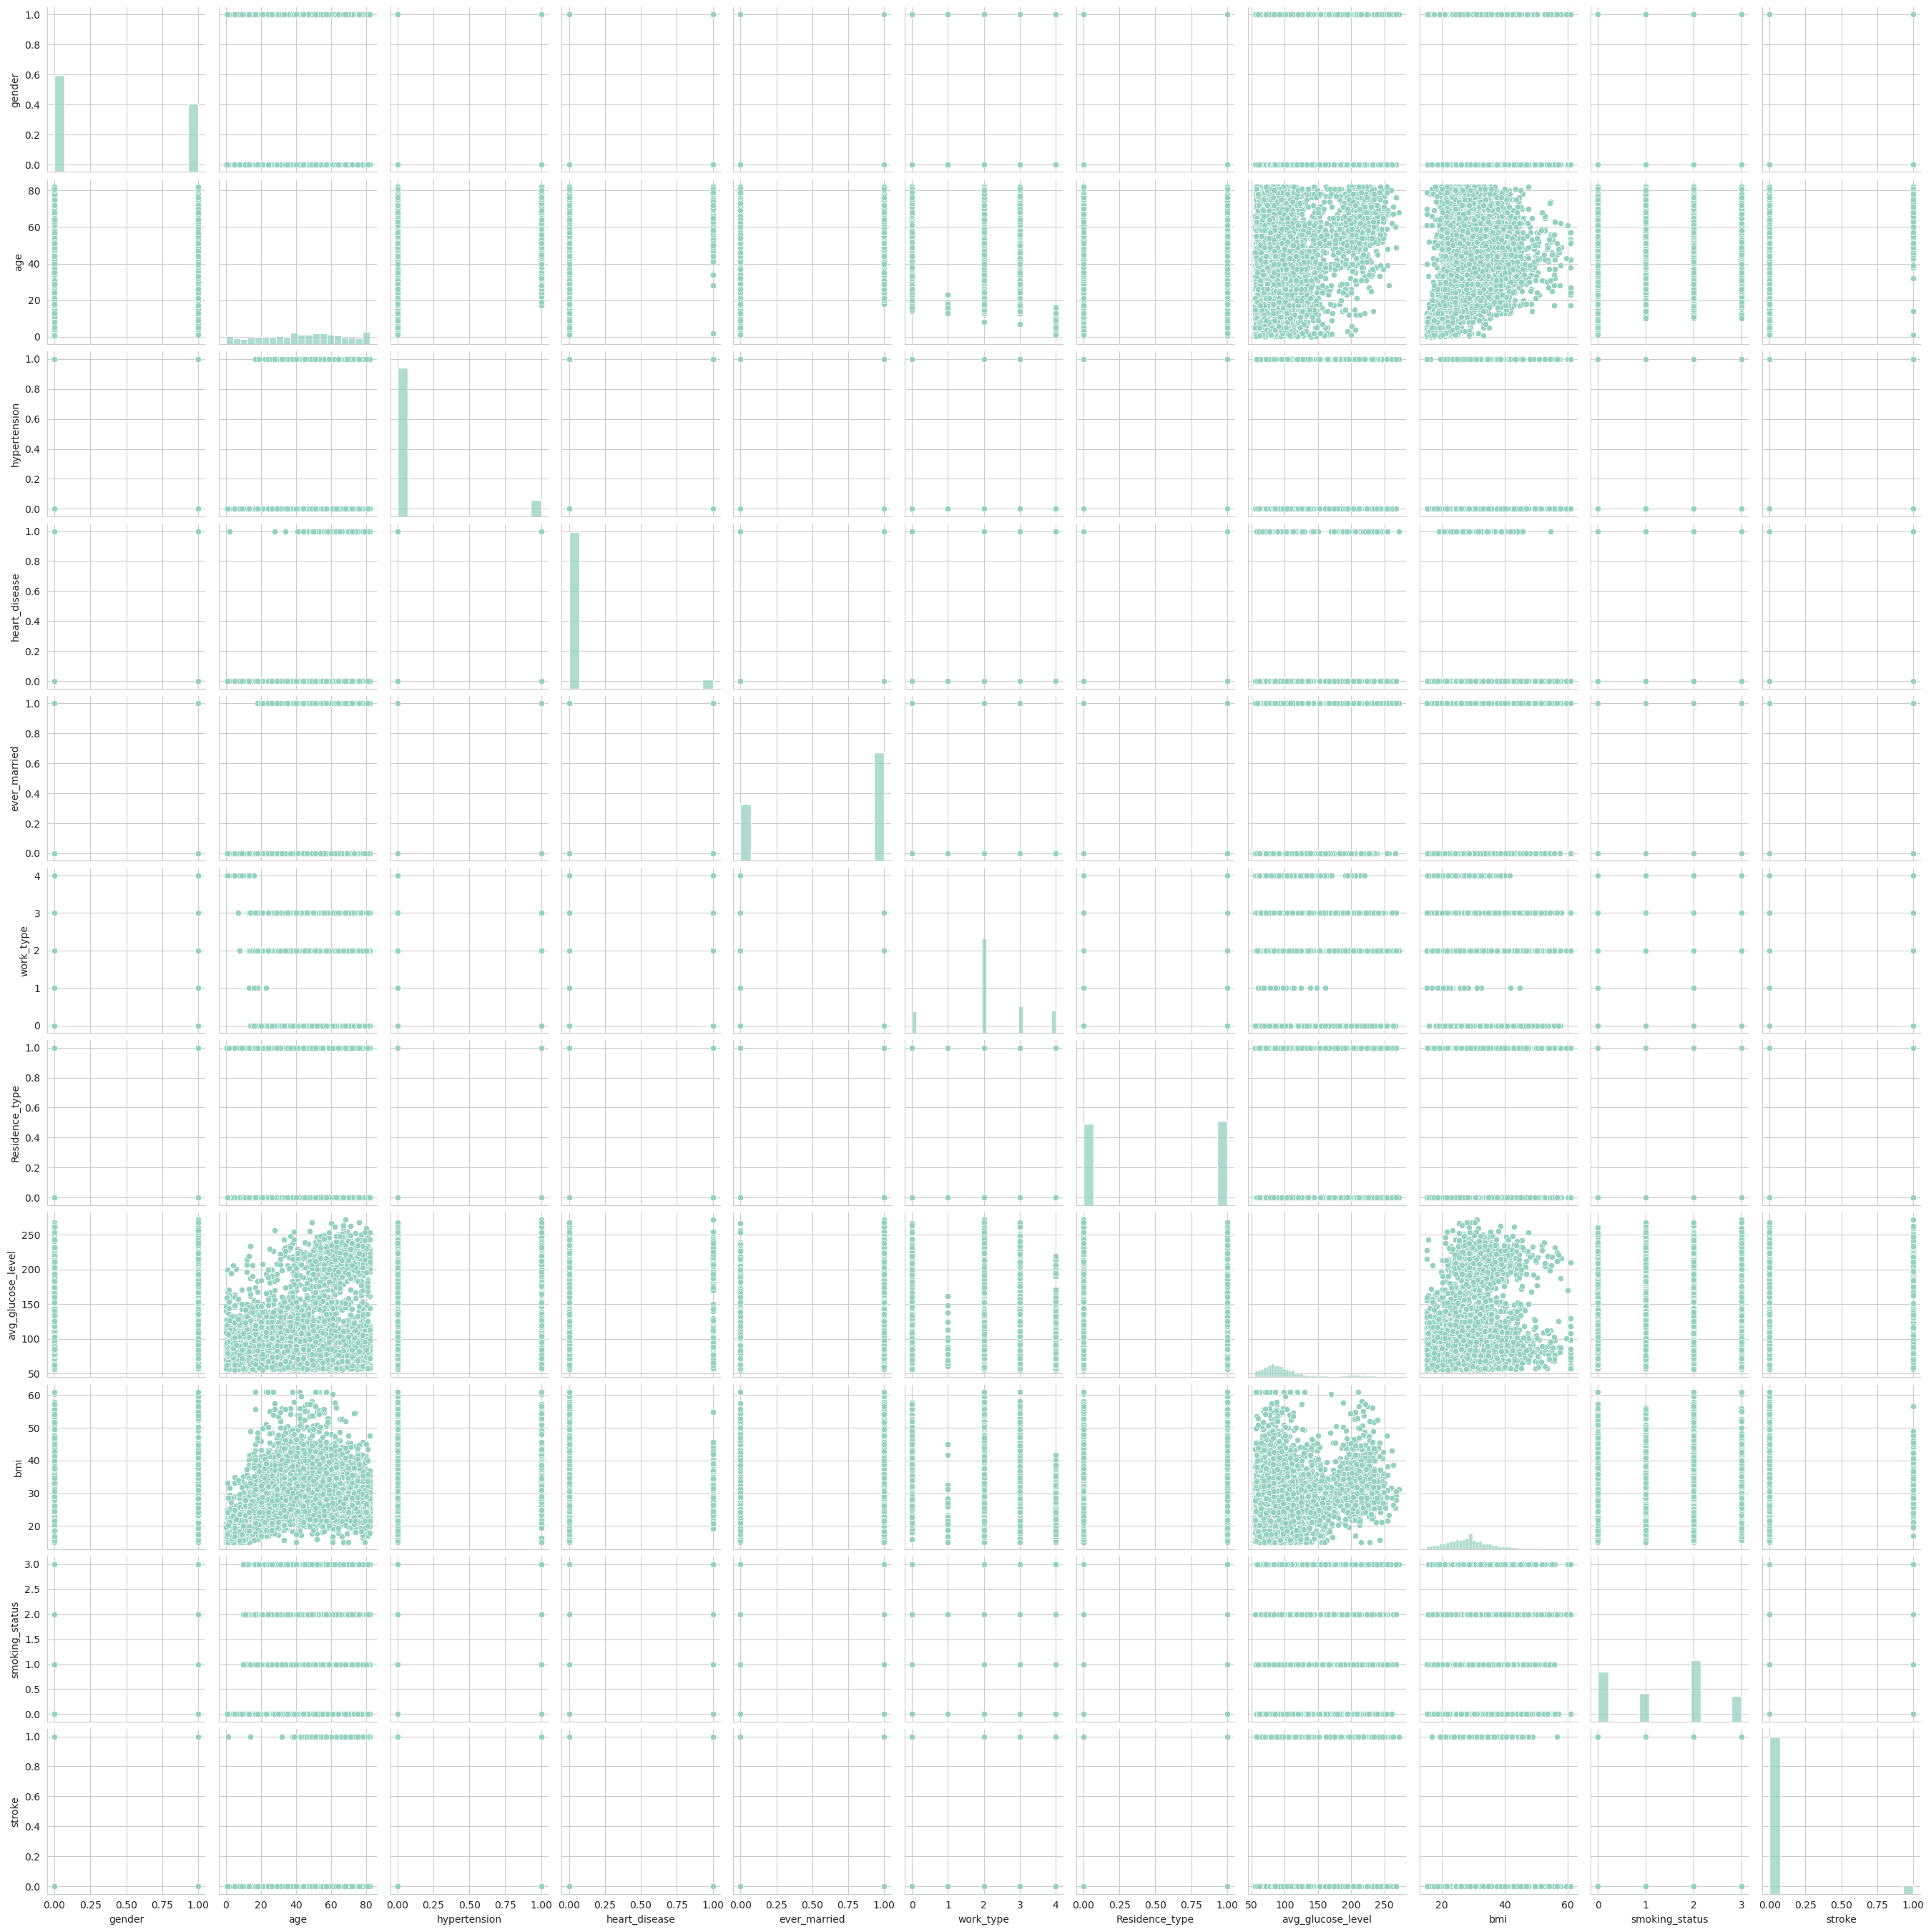

In [915]:
sns.pairplot(data)

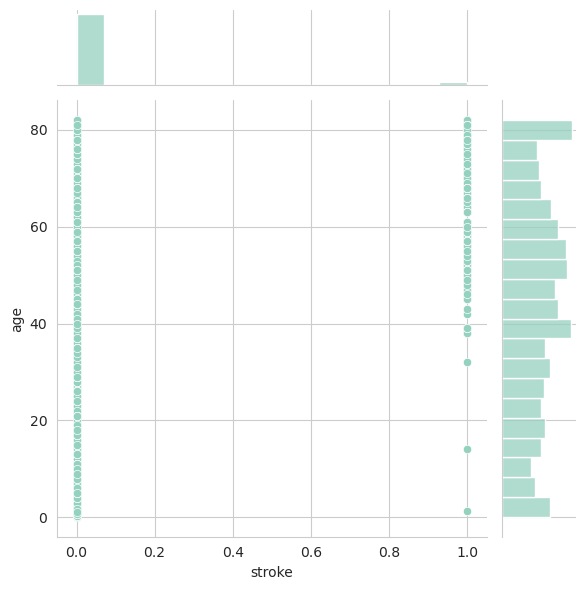

In [916]:
sns.set_palette("GnBu_d")
sns.set_style('whitegrid')
sns.jointplot(x='stroke',y='age',data=data)

In [917]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5109 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5109 non-null   int64  
 1   age                5109 non-null   float64
 2   hypertension       5109 non-null   int64  
 3   heart_disease      5109 non-null   int64  
 4   ever_married       5109 non-null   int64  
 5   work_type          5109 non-null   int64  
 6   Residence_type     5109 non-null   int64  
 7   avg_glucose_level  5109 non-null   float64
 8   bmi                5109 non-null   float64
 9   smoking_status     5109 non-null   int64  
 10  stroke             5109 non-null   int64  
dtypes: float64(3), int64(8)
memory usage: 479.0 KB


In [918]:
data = pd.pandas.get_dummies(data)

data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.600000,1,1
1,0,61.0,0,0,1,3,0,202.21,29.065758,2,1
2,1,80.0,0,1,1,2,0,105.92,32.500000,2,1
3,0,49.0,0,0,1,2,1,171.23,34.400000,3,1
4,0,79.0,1,0,1,3,0,174.12,24.000000,2,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,0,80.0,1,0,1,2,1,83.75,29.065758,2,0
5106,0,81.0,0,0,1,3,1,125.20,40.000000,2,0
5107,0,35.0,0,0,1,3,0,82.99,30.600000,2,0
5108,1,51.0,0,0,1,2,0,166.29,25.600000,1,0
